# This Notebook was done by:

    ELGHABI Taha
    EL Batouri Badr-eddine

## 1. Loading modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("./data"))

['athlete_events.csv', 'marks.txt', 'marks2.txt', 'noc_regions.csv']


## 2. Loading Data

In [2]:
# DataFrame athlete_events file data
athletes = pd.read_csv("./data/athlete_events.csv") 

# DataFrame noc_regions.csv file data
regions = pd.read_csv("./data/noc_regions.csv")

In [3]:
# Display the first 5 lines of the "data" Dataframe
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
# Concatenation of the two dataframes
merged = pd.merge(regions, athletes, on='NOC')
merged.head()

,NOC,region,notes,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
0,AFG,Afghanistan,NaN,502,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,1956 Summer,1956,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN
1,AFG,Afghanistan,NaN,1076,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN
2,AFG,Afghanistan,NaN,1101,Mohammad Anwar Afzal,M,NaN,NaN,NaN,Afghanistan,1948 Summer,1948,Summer,London,Football,Football Men's Football,NaN
3,AFG,Afghanistan,NaN,1745,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN
4,AFG,Afghanistan,NaN,4628,Mohammad Daoud Anwary,M,22.0,NaN,NaN,Afghanistan,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",NaN


### 1 - Determination of the top performing athletes in each sport with the number of gold medals they have won and the team to which each of them belongs.

### 2 - Find all the women who participated in the Olympics and obtained a gold medal, and replace them with the following format: N.P.
Example :
Alexa Poteillas => A.P

In [5]:
# first we get the female atheletes with a gold medal
female_gold_medalist = athletes [ (athletes["Medal"] == "Gold") & (athletes["Sex"] == "F") ]
female_gold_medalist


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold
1494,832,Nicola Virginia Adams,F,29.0,164.0,51.0,Great Britain,GBR,2012 Summer,2012,Summer,London,Boxing,Boxing Women's Flyweight,Gold
1495,832,Nicola Virginia Adams,F,33.0,164.0,51.0,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Women's Flyweight,Gold
1527,846,Valerie Kasanita Adams-Vili (-Price),F,23.0,193.0,120.0,New Zealand,NZL,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270588,135331,Olha Valentynivna Zubareva,F,22.0,182.0,90.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Handball,Handball Women's Handball,Gold
270934,135488,Nataliya Vladimirovna Zuyeva,F,19.0,176.0,62.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Gold
270970,135501,Ellina Aleksandrovna Zvereva (Kisheyeva-),F,39.0,183.0,100.0,Belarus,BLR,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's Discus Throw,Gold
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold


In [6]:
# function that will format the name in requested form
def format(name):
    string=""
    l=name.split()
    for i in range(len(l)):
        if l[i][0] != "(":   # handeling extereme cases 
            string+=l[i][0]+"."
    try:
        string = string[:-1] # removing the last . in the abriviation
        return(string)
    except:
        print(name) 
        
# applying the function to the Name column
female_gold_medalist["Name"].apply(format)

79        R.M.A
283       M.I.A
1494      N.V.A
1495      N.V.A
1527      V.K.A
          ...  
270588    O.V.Z
270934    N.V.Z
270970    E.A.Z
271009      J.Z
271076    G.I.Z
Name: Name, Length: 3747, dtype: object

### 3 - Calculate the proportion of women who won a gold medal in the summer games by sport discipline

In [7]:
# the ratio of women gold medialist by sport discipline
female_gold_ratio = athletes[ (athletes['Season']=='Summer') & (athletes['Medal']=='Gold') ].groupby('Sport')["Sex"].value_counts(normalize=True)
female_gold_ratio

Sport          Sex
Aeronautics    M      1.000000
Alpinism       M      0.750000
               F      0.250000
Archery        M      0.681481
               F      0.318519
                        ...   
Water Polo     F      0.180000
Weightlifting  M      0.838710
               F      0.161290
Wrestling      M      0.956416
               F      0.043584
Name: Sex, Length: 87, dtype: float64

### 4 - count people aged between 20 and 25 from Barcelona with a bronze medal

In [8]:
young_Barca_bronze = athletes[ (athletes['Age']<=25) & (athletes['Age']>=20) & (athletes['City']=='Barcelona') & (athletes['Medal']=='Bronze') ]
young_Barca_bronze.shape[0]

299

### 5 - How many events are held at the Olympics in each year?

In [9]:
# events grouped by year
Events = athletes.groupby( ['Year','Event'] )['Event'].nunique().groupby('Year')
Events.sum()

Year
1896     43
1900     90
1904     95
1906     74
1908    109
1912    107
1920    158
1924    148
1928    136
1932    145
1936    167
1948    175
1952    171
1956    175
1960    177
1964    197
1968    207
1972    228
1976    235
1980    241
1984    260
1988    283
1992    314
1994     61
1996    271
1998     68
2000    300
2002     78
2004    301
2006     84
2008    302
2010     86
2012    302
2014     98
2016    306
Name: Event, dtype: int64

### 6 - What was the female share in the Olympic Games over the century?

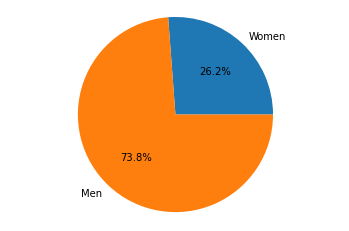

In [10]:
# showing the female share in the Olympic in a pie
womenpie =athletes[(athletes['Year']>=1916) & (athletes['Sex']=='F')]['Name'].nunique()
menpie =athletes[(athletes['Year']>=1916) & (athletes['Sex']=='M')]['Name'].nunique()

plt.pie( [womenpie,menpie], labels=["Women","Men"], autopct='%0.1f%%')

plt.axis('equal')
plt.show()

### 7-1 - What if you want to filter the values of one column (or more) based on conditions on the values of other columns?

In [11]:
# Filtering the datafram from male USA athletes who got a gold medal
no_USA =athletes [ (athletes['NOC']!='USA') & (athletes['Sex']=='M') & (athletes['Medal']=='Gold') ]
no_USA.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold
76,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Combined,Gold
78,20,Kjetil Andr Aamodt,M,34.0,176.0,85.0,Norway,NOR,2006 Winter,2006,Winter,Torino,Alpine Skiing,Alpine Skiing Men's Super G,Gold
113,40,Roald Edgar Aas,M,31.0,NaN,NaN,Norway,NOR,1960 Winter,1960,Winter,Squaw Valley,Speed Skating,"Speed Skating Men's 1,500 metres",Gold
117,42,Thomas Valentin Aas,M,25.0,NaN,NaN,Taifun,NOR,1912 Summer,1912,Summer,Stockholm,Sailing,Sailing Mixed 8 metres,Gold


### 7-2 - Imputation of missing values

In [12]:
# filling the missing values with their mean
athletes["Weight"].fillna(athletes["Weight"].mean())
athletes["Height"].fillna(athletes["Height"].mean())

0         180.00000
1         170.00000
2         175.33897
3         175.33897
4         185.00000
            ...    
271111    179.00000
271112    176.00000
271113    176.00000
271114    185.00000
271115    185.00000
Name: Height, Length: 271116, dtype: float64

### 8 - Display the Chinese male athletes who competed in the 2016 summer games and won a gold medal.

In [13]:
Chinese=athletes[(athletes['Sex']=='M') & (athletes['Games']=='2016 Summer') & (athletes['Medal']=='Gold')]
Chinese.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1080,608,Ahmad Abughaush,M,20.0,178.0,68.0,Jordan,JOR,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Men's Featherweight,Gold
1849,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Gold
1850,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Gold
2453,1374,Tontowi Ahmad,M,29.0,179.0,72.0,Indonesia-1,INA,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Mixed Doubles,Gold
2926,1634,Taha Akgl,M,25.0,192.0,125.0,Turkey,TUR,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Super-Heavyweight, Freestyle",Gold
